In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b07b61a9734ffdb538936c12a27a0b7f


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | west wendover
Processing Record 11 of Set 1 | celestun
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | bacuit
City not found. Skipping...
Processing Record 17 of Set 1 | yangambi
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | cabo san lucas
Processi

Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | sembe
Processing Record 42 of Set 4 | viedma
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | flinders
Processing Record 46 of Set 4 | akyab
Processing Record 47 of Set 4 | goderich
Processing Record 48 of Set 4 | falealupo
City not found. Skipping...
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | paciran
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | sulphur springs
Processing Record 4 of Set 5 | lahij
Processing Record 5 of Set 5 | mnogovershinnyy
Processing Record 6 of Set 5 | martapura
Processing Record 7 of Set 5 | durham
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | gravdal
Processing Record 10 of Set 5 | port shepstone
Processing Record 11 of Set 5 | berlevag
Processing Record 12 of Set 5 | dubuque
Proc

Processing Record 32 of Set 8 | gunjur
Processing Record 33 of Set 8 | ada
Processing Record 34 of Set 8 | mount isa
Processing Record 35 of Set 8 | chapada dos guimaraes
Processing Record 36 of Set 8 | dwarka
Processing Record 37 of Set 8 | vestmanna
Processing Record 38 of Set 8 | dakar
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | kalghatgi
Processing Record 41 of Set 8 | kashima
Processing Record 42 of Set 8 | price
Processing Record 43 of Set 8 | khani
Processing Record 44 of Set 8 | talaya
Processing Record 45 of Set 8 | ostersund
Processing Record 46 of Set 8 | sungaipenuh
Processing Record 47 of Set 8 | airai
Processing Record 48 of Set 8 | gurgan
City not found. Skipping...
Processing Record 49 of Set 8 | mount pleasant
Processing Record 50 of Set 8 | kharan
Processing Record 1 of Set 9 | itacarambi
Processing Record 2 of Set 9 | katobu
Processing Record 3 of Set 9 | lidorikion
City not found. Skipping...
Processing Record 4 of Set 9 | kungurtug
Proces

Processing Record 20 of Set 12 | banjar
Processing Record 21 of Set 12 | vanavara
Processing Record 22 of Set 12 | leopold
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | poum
Processing Record 25 of Set 12 | campbell river
Processing Record 26 of Set 12 | eldikan
City not found. Skipping...
Processing Record 27 of Set 12 | zyryanskoye
Processing Record 28 of Set 12 | praia da vitoria
Processing Record 29 of Set 12 | peniche
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | mahebourg
Processing Record 32 of Set 12 | usinsk
Processing Record 33 of Set 12 | novyy urgal
Processing Record 34 of Set 12 | bandarbeyla
Processing Record 35 of Set 12 | victor harbor
Processing Record 36 of Set 12 | hualmay
Processing Record 37 of Set 12 | rameswaram
Processing Record 38 of Set 12 | magalia
Processing Record 39 of Set 12 | adrar
Processing Record 40 of Set 12 | sisimiut
Processing Record 41 of Set 12 | talippara

In [10]:
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,14.74,95,100,3.62,GL,2022-04-01 22:02:00
1,Upernavik,72.7868,-56.1549,10.06,95,100,8.21,GL,2022-04-01 22:02:00
2,Arraial Do Cabo,-22.9661,-42.0278,75.24,89,100,21.16,BR,2022-04-01 22:02:01
3,Bengkulu,-3.8004,102.2655,75.38,85,15,4.54,ID,2022-04-01 22:02:01
4,Bredasdorp,-34.5322,20.0403,63.75,72,93,11.99,ZA,2022-04-01 22:02:01
5,Atuona,-9.8000,-139.0333,78.87,78,25,7.29,PF,2022-04-01 21:57:01
6,Saint-Pierre,-21.3393,55.4781,73.08,94,100,3.44,RE,2022-04-01 22:02:02
7,Mar Del Plata,-38.0023,-57.5575,62.87,79,71,20.00,AR,2022-04-01 22:02:02
8,West Wendover,40.7391,-114.0733,54.91,23,63,6.35,US,2022-04-01 22:02:02
9,Celestun,20.8667,-90.4000,80.94,79,33,10.13,MX,2022-04-01 22:02:02


In [16]:
new_city_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_data_df]


In [17]:
city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-04-01 22:02:00,77.4840,-69.3632,14.74,95,100,3.62
1,Upernavik,GL,2022-04-01 22:02:00,72.7868,-56.1549,10.06,95,100,8.21
2,Arraial Do Cabo,BR,2022-04-01 22:02:01,-22.9661,-42.0278,75.24,89,100,21.16
3,Bengkulu,ID,2022-04-01 22:02:01,-3.8004,102.2655,75.38,85,15,4.54
4,Bredasdorp,ZA,2022-04-01 22:02:01,-34.5322,20.0403,63.75,72,93,11.99
...,...,...,...,...,...,...,...,...,...
569,Buique,BR,2022-04-01 22:16:44,-8.6231,-37.1558,70.09,85,96,5.84
570,Nikki,BJ,2022-04-01 22:16:44,9.9401,3.2108,89.53,24,80,4.72
571,Huanren,CN,2022-04-01 22:16:44,41.2647,125.3667,33.64,45,66,0.40
572,Grand-Santi,GF,2022-04-01 22:16:44,4.2500,-54.3833,72.75,100,100,1.77


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

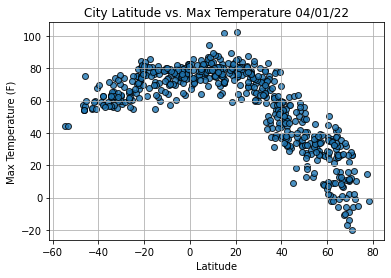

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

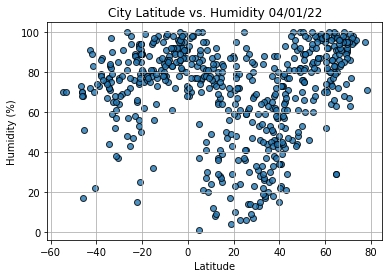

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

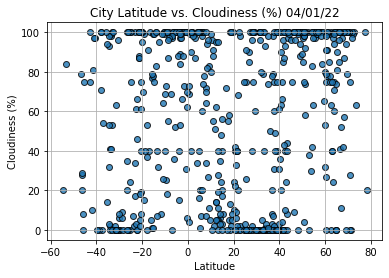

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

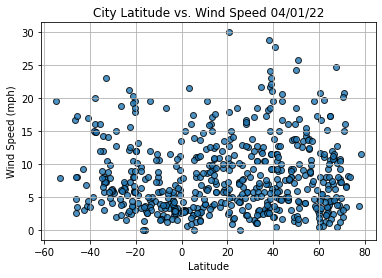

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
